<a href="https://colab.research.google.com/github/Indhraneel14inks/my_projects/blob/master/CNN%20Projects/mnist_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [ ]:
from keras.datasets import mnist
(X_train, y_train) , (X_test, y_test) = mnist.load_data()

In [ ]:
print("Training shape " + str(X_train.shape))
print("Testing shape " + str(X_test.shape))

Training shape (60000, 28, 28)
Testing shape (10000, 28, 28)


In [ ]:
from google.colab.patches import cv2_imshow
for i in range(10):
  rand_no = np.random.randint(0, len(X_train))
  image = X_train[rand_no]
  cv2_imshow(image)
  print()


In [ ]:
X_train[1].shape

(28, 28)

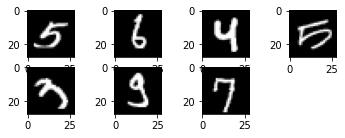

In [ ]:
for i in range(7):
  rand_no = np.random.randint(0, len(X_train))
  image = X_train[rand_no]
  plt.subplot(441+ i)
  plt.imshow(image, cmap = plt.get_cmap("gray"))

  

In [ ]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], X_test.shape[2], 1)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
X_train /= 255
X_test /= 255

In [ ]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.callbacks import EarlyStopping
model = Sequential()
input_shape = (X_train.shape[1], X_train.shape[2], 1)

In [ ]:
callback = EarlyStopping(monitor = "val_accuracy", patience = 3)
model.add(Conv2D(32, (5,5), activation= "relu", input_shape = input_shape))
model.add(MaxPool2D())
model.add(Conv2D(64, (5,5), activation= "relu"))
model.add(MaxPool2D())
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(y_train.shape[1], activation="softmax"))

model.compile(optimizer= "adam", 
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

model.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

In [ ]:
batch_size= 32
epochs = 10

In [ ]:
history = model.fit(X_train, y_train, batch_size= batch_size, epochs = epochs, verbose= 1,
          validation_data = (X_test, y_test), callbacks = [callback])

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.3491 - accuracy: 0.8898 - val_loss: 0.0387 - val_accuracy: 0.9881
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0586 - accuracy: 0.9828 - val_loss: 0.0312 - val_accuracy: 0.9901
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0426 - accuracy: 0.9871 - val_loss: 0.0231 - val_accuracy: 0.9932
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0322 - accuracy: 0.9902 - val_loss: 0.0200 - val_accuracy: 0.9928
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0268 - accuracy: 0.9917 - val_loss: 0.0197 - val_accuracy: 0.9931
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0222 - accuracy: 0.9929 - val_loss: 0.0206 - val_accuracy: 0.9937
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0206 - accuracy: 0.9935 - val_loss: 0.0268 - val_ac

In [ ]:
history_dict = history.history

In [ ]:
epoch = range(1, len(history_dict["loss"])+1)
epoch

range(1, 10)

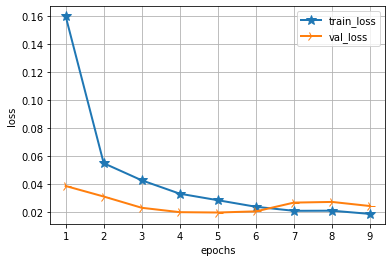

In [ ]:
a = plt.plot(epoch, history_dict["loss"], label = "train_loss")
b = plt.plot(epoch, history_dict["val_loss"], label = "val_loss")
plt.setp(a, linewidth = 2, marker = "*", markersize = 10.0)
plt.setp(b, linewidth = 2, marker = "4", markersize = 10)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid(True)
plt.legend()
plt.show()

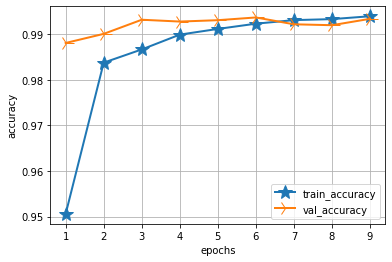

In [ ]:
c = plt.plot(epoch, history_dict["accuracy"], label = "train_accuracy")
d = plt.plot(epoch, history_dict["val_accuracy"], label = "val_accuracy")
plt.setp(c, linewidth = 2, marker = "*", markersize = 15)
plt.setp(d, linewidth = 2, marker = "4", markersize = 15)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
model.save("mnist_classifier.h5")